# 공공 인공지능 Open API 활용
- 객체검출 API 란?
- 이미지에서 사람, 자동차 등 일반적으로 나타나는 다양한 종류의 객체 카테고리를 분류하고 객체의 위치정보(박스 좌표)를 감지할 수 있는 기술로 활용됩니다.
- 영상 데이터에서 다양한 형태의 객체를 인식하는 객체 인식기를 통해 객체 인식 결과를 제공합니다.
- 객체 검출 (Object Detection) API는 HTTP 기반의 REST API 인터페이스로 JSON 포맷 기반의 입력 및 출력을 지원하며 ETRI에서 제공하는 API Key 인증을 통해 사용할 수 있는 Open API 입니다.

In [1]:
with open('etriapikey.txt') as kfile:
    etri_key = kfile.read()

In [2]:
import urllib3
import json
import base64
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"

In [13]:
import os
img_file = '../02.CNN/animals/dolphin.jpg'
_, image_type = os.path.splitext(img_file)
image_type

'.jpg'

In [14]:
image_type ='jpg' if image_type=='.jfif' else image_type[1:]
image_type

'jpg'

In [15]:
with open(img_file, 'rb') as file:
    image_contents = base64.b64encode(file.read()).decode("utf8")

In [16]:
request_Json = {
    "access_key": etri_key,
    "argument": {
        "type": image_type,
        "file": image_contents
    }
}

In [17]:
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(request_Json)
)

In [18]:
print("[responseCode] " + str(response.status))

[responseCode] 200


In [19]:
print(response.data)

b'{"result":0,"return_object":{"data":[{"class":"bird","confidence":"0.992116","x":"105","y":"16","width":"411","height":"402"}]}}'


In [20]:
result = json.loads(response.data)
result

{'result': 0,
 'return_object': {'data': [{'class': 'bird',
    'confidence': '0.992116',
    'x': '105',
    'y': '16',
    'width': '411',
    'height': '402'}]}}

In [23]:
obj_list = result['return_object']['data']
obj_list[0]

{'class': 'bird',
 'confidence': '0.992116',
 'x': '105',
 'y': '16',
 'width': '411',
 'height': '402'}

## 시각화

In [21]:
from PIL import Image, ImageDraw, ImageFont 
import matplotlib.pyplot as plt
%matplotlib inline

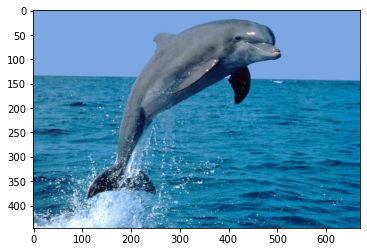

In [29]:
image = Image.open(img_file)
plt.imshow(image)
plt.show()

In [30]:
draw = ImageDraw.Draw(image)
obj = obj_list[0]
name = obj['class']
x = int(obj['x'])
y = int(obj['y'])
w = int(obj['width'])
h = int(obj['height'])
draw.text((x+10,y+10), name, font=ImageFont.truetype('malgun.ttf',20), fill=(255,0,0))   # fill은 색상 red 의미
draw.rectangle(((x,y), (x+w,x+h)), outline=(255,0,0), width=2)

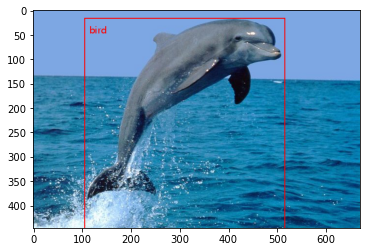

In [31]:
plt.imshow(image)
plt.show()